서울시 구별 cctv 현황분석
    서울시 각구별 cctv 수를 확인후
    인구대비 cctv 비율 파악후 순위비교
    인구대비 cctv 평균 확인

분석에 사용하는 데이터
    서울시자치구인도별 cctv 설치현황01. CCTV_in_Seoul.csv
    서울시 인구현황 01. population_in_Seoul.xls

데이터분석작업순서
    1 파일로 부터 데이터 읽어오기
        - cctv 파일 읽어오기 
            - '구별 '열이름 변경
        -서울시 인구현황 파일 읽어오기
            - 열이름 변경
    2 데이터 파악 
        - cctv 데이터파악 /서울시 인구데이터파악
            -cctv가 가장 많은 구 적은구 파악
            -최근 cctv 증가율을 구하기
            -필요없는 행삭제
            서울시 인구데이터파악
            -구 이름 확인
            -NaN 확인후 포함된 행삭제
            - 인구 분석 작업
                - 외국인비율/고령자 비율 구하기
                - 인구가 제일 많은구
                - 외국인이 제일 많은구
                - 외국인 비율이 제일 높은 구
                - 고령자가 가장 많은 구
        3 cctv 데이터와 인구데이터합치고분석하기
            -구별 기준으로 데이터 합치기
            -의미없는열삭제
            -구별로 인덱스설정
            -상관관계분석
            -
    4 cctv 인구현황 그래프 작성하고 분석하기
        -cctv 현황 그래프 수평막대그래프
        -인구 대비 cctv 비율을 계산해서 정렬하고 막대그래프 출력
        -분산형 산점도 그래프 출력
        -인구수 대비 몇 대의 cctv수가 적당한 지 알기위해서 
            -인구수와 cctv 수를 이용해서 최소오차 직선식 그리기
    5 결과를 파일로 저장

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1 파일로 부터 데이터 읽어오기
# 1) cctv 파일 읽어오기

In [256]:
cctv_seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv',encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


# 상대경로 : 앞에서 쓴 '' 상대경로이다.  '../data/01. CCTV_in_Seoul.csv' ..:앞으로 간다
# 현재 디렉터리 (.//)루트로 나갔다가 data폴더로 들어간다
# 같은 폴더에 있으면 파일만적거나 ./만 적으면됨

In [257]:
cctv_seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [258]:
# 열이름 컬럼명 출력
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [259]:
#열이름 중에서 첫번째 항목 출력
cctv_seoul.columns[0]

'기관명'

In [260]:
# 기관명 을 구별로 변경
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'},inplace=True) # inplace 바로 변경해라
cctv_seoul.head()
# inplace - true 변수의 내용갱신 작업완료 없으면 변경되지않음

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [241]:
#2 서울시 인구현황 파일 읽어오기
#엑셀파일읽기
pop_seoul = pd.read_excel('../data/01. population_in_Seoul.xls',encoding='utf-8')
pop_seoul.head() # 앞에 5개까지만 출력

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [267]:
pop_seoul.columns #열이름출력

Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object')

In [268]:
#필요없는 행과 열 제외하고 파일 필요한 부분만 읽어오기
#몇행부터 읽어오기 = header
#행은 세번째 줄부터 읽고 
# 열은 B/D/G/J/N 만 읽어오는 옵션 추가해서 파일 읽기

pop_seoul = pd.read_excel('../data/01. population_in_Seoul.xls',
                          encoding='utf-8',
                          header=2, # 012 세서, 3번째 행부터
                         usecols='B,D,G,J,N') #선택열
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [269]:
#원본데이터 그대로 두고 파이썬코드 작업하기 (꼮)
# 열이름 변경 : 구별, 인구수,한국인,외국인, 고령자
# pop_seoul.columns=['A','B','C','D','E']
# pop_seoul
# pop_seoul.rename(columns={pop_seoul.columns[0] : '구별'},inplace=True)
# pop_seoul.rename(columns={pop_seoul.columns[1] : '인구수'},inplace=True)
# pop_seoul.rename(columns={pop_seoul.columns[2] : '한국인'},inplace=True)
# pop_seoul.rename(columns={pop_seoul.columns[3] : '외국인'},inplace=True)
# pop_seoul.rename(columns={pop_seoul.columns[4] : '고령자'},inplace=True) # inplace 바로 변경해라

pop_seoul.rename(columns={pop_seoul.columns[0] : '구별',
                         pop_seoul.columns[1] : '인구수',
                         pop_seoul.columns[2] : '한국인',
                         pop_seoul.columns[3] : '외국인',
                         pop_seoul.columns[4] : '고령자'},inplace=True)





pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [245]:
#2데이터파악
## 1 cctv 데이터파악

In [270]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [271]:
# 소계를 기준으로 오름차순 정렬
# cctv가 가장 작은 구 5개 # 이거할줄알아야됌!!!!
cctv_seoul.sort_values (by= '소계').head() # sort_values = 




,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [272]:
# cctv가 가장 많은구 5개 (내림차순) 
cctv_seoul.sort_values(by='소계',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [273]:
# 최근 3년간 cctv 증가율 
# 최근 3년에 해당되는 2014-2016 년의 cctv 수를 더해서 
# cctv_seoul.columns[3:]
# 2013년 이전 cctv 수로 나눈다음  곱하기 100
#'최근증가율' 열추가
cctv_seoul['최근증가율']= (cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년'])/ cctv_seoul['2013년도 이전']*100
#행이 길어서 여러 행으로 나눌경우 역슬래쉬 
# 최근 증가율이 높은 구 5개 확인 -내림차순
cctv_seoul.sort_values(by='최근증가율',ascending= False).head()


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [274]:
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780
5,광진구,878,573,78,53,174,53.228621
6,구로구,1884,1142,173,246,323,64.973730
7,금천구,1348,674,51,269,354,100.000000
8,노원구,1566,542,57,451,516,188.929889
9,도봉구,825,238,159,42,386,246.638655


In [216]:
#서울시 인구 데이터파악
#서울시 인구 현황확인
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [217]:
#불필요한 0행 삭제 drop 함수삭제
pop_seoul.drop([0],inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [218]:
#구이름 확인
# 구 이름 옆에 다른 것이 들어있는지 검사
# 구별 의 이름을 한 번씩만 출력
#unique 함수 : 반복된 값은 한번만 출력
pop_seoul ['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [219]:
#NaN이 어디있는지 들어있는지 확인 : isnull() 함수 사용
#구별의 각 행마다 NaN 이 들어있는지 확인해보기
#연습
pop_seoul.isnull()

,구별,인구수,한국인,외국인,고령자
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False
10,False,False,False,False,False


In [220]:
#정답
pop_seoul[pop_seoul['구별'].isnull()] #인덱스가 됨

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [339]:
#NaN 행삭제
# 연습:del pop_seoul[pop_seoul[]]
pop_seoul.drop([26],inplace=True)
pop_seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


In [337]:
#외국인 비율과 고령자 비율 계산해서 열추가
#외국인비율 = 외국인/전체인구수 *100

pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['인구수'] *100

In [338]:
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['인구수']*100

In [313]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [314]:
#인구가 가장많은구확인(5개)
#인구수기준 내림차순정렬
pop_seoul.sort_values(by='인구수',ascending=False).head() #연습





,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [315]:
#외국인이 가장 많은구확인(5개)
#외국인기준 내림차순정렬
pop_seoul.sort_values(by='외국인',ascending=False).head() #연습

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [316]:
#외국인 비율이 가장 높은구 확인(5개)
#외국인비율을 기준 내림차순정렬
pop_seoul.sort_values(by='외국인비율',ascending=False).head() #연습

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [317]:
#고령자가 가장 많은구 확인(5개)
#고령자기준 내림차순정렬
pop_seoul.sort_values(by='고령자',ascending=False).head() #연습

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [318]:
# 고령자비율이 높은 구 확인 (5개)
#고령자비율기준 내림차순정렬
pop_seoul.sort_values(by='고령자비율',ascending=False).head() #연습


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [319]:
#3 cctv데이터아 인구 데이터 합치고 분석하기
#cctv 데이터확인
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [320]:
#서울시 인구현황 데이터 확인
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [321]:
#cctv 데이터와 인구현황데이터병합
data_result= pd.merge(cctv_seoul,pop_seoul,on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [355]:
#data_result
data_result.columns

Index(['구별', '소계', '2014년', '2015년', '2016년', '최근증가율', '인구수', '한국인', '외국인',
       '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [356]:
#의미없는 열 삭제 :del 명령
#행 삭제 : drop 함수
# del data_result['2013년도 이전']
# del data_result['2014년']
# del data_result['2015년']
# del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [357]:
#그래프 작성시 index로 구 이름 출력되도록 index를 구별로 설정
data_result.set_index('구별',inplace=True)

In [358]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#상관관계 분석
지금까지 인구 데이터를 분석해서 '고령자비율''외국인비율'을 구하고
'고령자비율''외국인비율''인구수' 등을 기준으로 정렬해서 각 항목별 순위를 
살펴보았다

이제 지금봤던 고령자비율이나 외국인비율 인구수 중에서 어떤 데이터와 cctv를 비교할지 결정
가장 단순한 작업 : 상관관계 조사 하는것 
    상관계수를 계산하여 구하고 
    상관 계수가 가장 큰 값에 데이터와 비교
#상관관계 correlation coeficient
한 변수의 변화에 따른 다른변수의 변화정도 및 방향예측하는 분석기법
두 데이터간의 관계를 파악하는데 사용
상관관계 분석: 상관관계의 절대값 수치를 확인하여
    상관관계가 있는지 확인
상관계수 : 두 데이터가 어느정도의 관계를 가지고 있는지 보여주는 계수
    

상관관계의 절대값이 0.1이하일시 거의 무시
0.1 보다 크고 0.3 이하면 약한상관관계 
0.7 뚜렷한 상관관계가 존재한다 


#상관계수 계산
numpy 라이브러리 corrcoef 함수사용
결과를 행렬로 변환
주 대각선을 기준으로 대칭인 행렬로 
대각선을 제외한 다른값이 상관계수가됨

In [359]:
#상관계수를 계산에 사용할 데이터
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [360]:
#'고령자 비율'과 cctv'소계' 상관계수 구하기
np.corrcoef(data_result['고령자비율'],data_result['소계'])

##절대값이 0.258 
# 고령자 비율 ;소계 0.258 <0.3 약한 상관관계가 존재


array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

In [361]:
#외국인비율과 소계 상관계수구하기
np.corrcoef(data_result['외국인비율'],data_result['소계'])
# 절대값이 0.052 < 무시 

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

In [362]:
#인구수와 소계 상관계수구하기
#절대값이 0.243 < 약한상관관계
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

cctv 개수와 상관계수 결과
고령자 비율 :소계 = 0.258 <약한상관관계존재
외국인 비율 : 소계 = 0.052 <무시
인구수 :소계 = 0.243 < 약한 상관관계
    
상관계수 비교 결과 
-' cctv 개수'와 '외국인' 과는 거의 상관관계가 없고 
- 'cctv 개수'와 '고령자' 및 '인구수'와는 약한상관관계있다.

In [363]:
# # 위의상관계수 분석결과에 따라 다음수행작업선정
# 'cctv 개수' 와 '고령자' 비율은 약한 상관관계  약한 음의 상관관계 음수
# 외국인 비율과는 큰 의미가 없다고 할 수 있음 

# 그런데 인구수와는 상관관계가 0.243 약한 상관관계가 있으므로 
# cctv와 인구수와의 관계를 좀 더 분석할 예정임


In [364]:
#cctv가 많이 설치된 구를 확인학위해 소계를 기준으로내림차순정렬
data_result.sort_values(by='소계',ascending=False).head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
은평구,2108,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [365]:
#인구수를 기준으로 내림차순 정렬
data_result.sort_values(by='인구수',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 다음수행작업
-cctv가 많이 설치된 구와 인구수가 많은 구를 시각적으로 비교
-시각화 도구를 사용해서 그래프 분석 작업 수행

In [366]:
## 4 cctv와 인구현황 그래프로 분석하기


In [367]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [368]:
#그래프 분석에 사용할 데이터
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


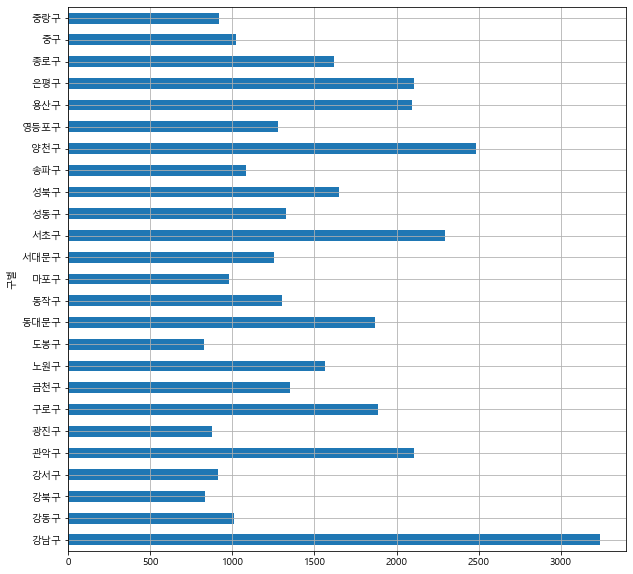

In [386]:
# cctv 현황 '소계'를 수평 막대 그래프로 출력
# 구별 = cctv_seoul['구별']
# 소계=cctv_seoul['소계']
# x= cctv_seoul['구별']
# 소계.plot(kind='barh',grid=True,figsize=(5,5))
# plt.yticks(x, 소계.구별) # 아무 의미 없는 x 순서대로만 잡아준다
# plt.show()
# 정답
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

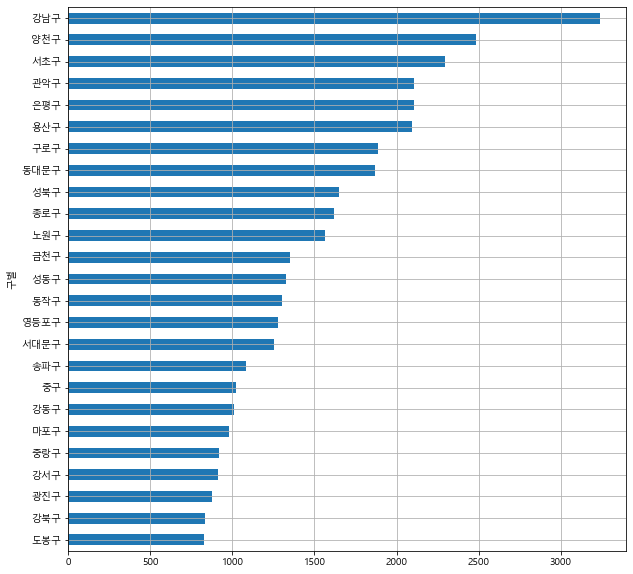

In [390]:
# 수평 바 그래프 정렬
# 소계 기준으로 내림차순 정렬
#결과 ....순
data_result['소계'].sort_values().plot(kind='barh', 
                                    grid=True,
                                    figsize=(10,10))
plt.show()
#강남>양천>서초>관악>은평 순으로 많다

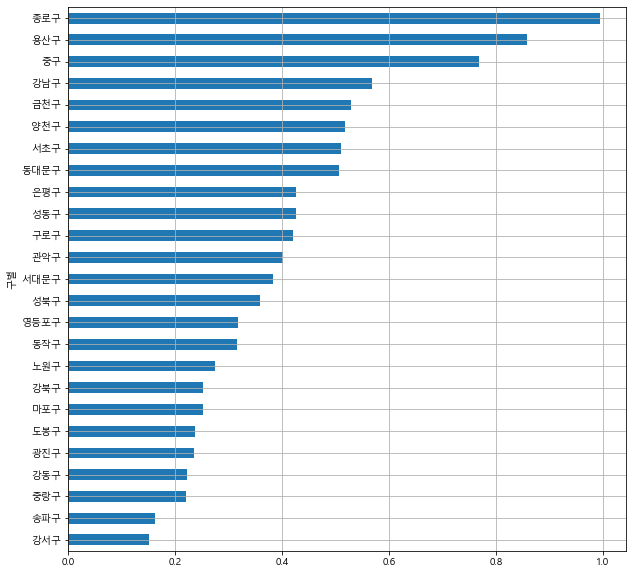

In [391]:
#인구 대비 cctv 비율을 계산해서 정렬하고 그래프 출력
# 수평 바 그래프 
#cctv비율 =소계/인구수 *100
data_result['cctv비율'] = data_result['소계']/data_result['인구수'] *100

data_result['cctv비율'].sort_values().plot(kind='barh', 
                                    grid=True,
                                    figsize=(10,10))
plt.show()

#높은구.. 종로구/용산구/중구 월등히 높다
#낮은구: 강서/송파/중랑구가 월등히 낮다
# 강남/양천/서초/관악/은평 구는 cctv 개수는 많지만 인구대비 cctv 비율에서
#강남구 양천구 서초구 는 상위에 포함되고
#은평구 관악구는 중간정도에 위치

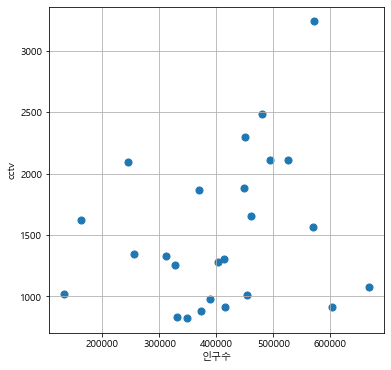

In [398]:
#분산형(산포도) 그래프 출력
#인구수 vs cctv
# tick label 나눔 되는기준 라벨링 grid 눈금표
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50) #x값,y값
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [ ]:
인구수와 cctv를 이용해 최소오차직선식구해서 그래프그리기작업순서
1 최소오차 직선식구하기
- 직선식의 계수 구하기 (ax+b)  numpy 의 ployfit 함수사용
    a: 기울기
    b: 절편
2 최소 오차 직선식의 그래프그리기
- 그래프를 그리려면 xy값필요
- 1번에서 구한직선식의 계수만으로는 그래프를 그릴 수 없음
- 그래프를 그리기 위한 xy 값을 생성  필요
    - x = 균일한 간격의 점을 자동 생성 (linspace(함수 )사용)
    - y = 위에서 구한 직선식에 해당되는 y값 필요
        -x값 받아 직선식에 맞는 y값 변환하기 위한함수필요
        -위에서 구한 기울기와 저렾ㄴ이용 y값으로 변환하기 위한 함수생성 (poly1d()함수사용)
        -poly1d x값을 받아 우리가 구한 최소오차 직선식에 맞는 y값 반환

-이렇게 구한 x, y값으로 그래프 에 최소오차 직선식 그리기


In [399]:
#최소 오차 직선식의 계수구하기
# 인구수 cctv 수가 양의 상관관계 있으므로 
# 인구수 대비 몇 대의 cctv 수가 적당한지 알기 위해서 
# 인구수와 cctv 수를 이용해서 최소 오차 직선식의 계수 구하기
#최소오차 직선식: ax +b
#a; 기울기 b: 절편

#polyfit() 함수 사용해서 최소오차 직선식 구하기
#polyfit (x,y,차수) 오차가 가장 적은 n차 방정식 개수 반환
# 1차식 경우 : ax+b >> a 와 b 반환 기울기와 절편 반환

# '인구수' 와 cctv '소계' 데이터에서 최소오차 직선식의 계수 구하기
polyfit_result = np.polyfit(data_result['인구수'],
                            data_result['소계'],
                           1)
polyfit_result



#array(기울기, 절편) (최소오차 직선식의 계수)
#기울기:1.15151285e-03
#절편: 1.04561312e+03


array([1.15151285e-03, 1.04561312e+03])

In [420]:
#  np.polyfit (x,y,차수) :입력과 출력 값으로 다항식의 개수를 찾아주는 함수
# -입력과 출력값으로부터 다항식의 계수를 찾아주는 함수
# 그래프를 그리기 위한 x값 받아서 
# 직선식에 맞는 y값으로 변환하기 위한 함수 만들기

# 계수 = 그래프를 그리기 위한 y축 예측값 찾을 수 없고 
# 함수로 만들어 입력을 주고 결과를 얻어야 하기 때문에 
# poly1d 함수를 사용해서 함수생성 : 결과를 함수로 받음
# 
#계수 =polyfit_result 를대입한 방정식
    #1.15151285e-03, + 1.04561312e+03
#함수 = poly1d(polyfit_result)
# polyfit_result 를 poly1d 에 전달하고 그 결과로 함수를 받음
func=np.poly1d(polyfit_result)
#이렇게 만들어진 함수 func 용도
    # 직선식을 그리는데 필요한 y값을 구하는데 사용
    





In [416]:
# 최소 오차 직선식을 그리는데 필요한 x값 생성
# numpy 의 linspace()함수사용
# x 축 범위 : x 축 점의 개수 지정
#linspace(start,end,num) (시작  끝 갯수)
# start end 범위에서 균일한 간격으로 num (갯수 )개 점을 생성
x_nums= np.linspace(100000,700000,100) #인구수에 맞춤
#x_nums

In [417]:
#linspace(start,end,num) 
#     시작점과 끝점을 균일 간격으로 나눈 점을 생성
#     start end 사이의 값을 num개 만큼 생성하여 배열로 반환
#     그래프 그리기에서 수평축 x축 의 간격을 만드는데 매우 유용하게 사용할수잇는 함수
    
# np.linspace ()
    

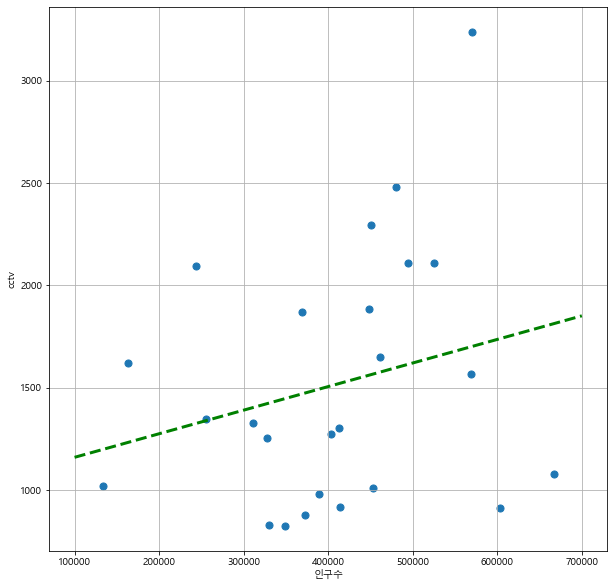

In [423]:
#그래프그리기 
#인구대비 cctv 소계의 분산형 (산점도 그래프)위에
#최소오차직선식표시
#분산형 그래프 산점도 그래프
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'], s=50)
#최소오차 직선식 표시: plot 이용한 
# x= linspace( )로 구한 x.nums 사용 
# y= x값 받아 최소 오차 직선식 맞는 y값 반환 하는 함수 사용
plt.plot(x_nums,func(x_nums), ls='dashed', lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()


In [422]:
# 직선의미
#인구수를 직선에 대입하여 얻은 수치
#인구수 대비 적정 cctv 계수
#x 대신 인구수 400,000 명 대입

y =  1.15151285e-03*400000 + 1.04561312e+03
y
# 인구수가 400,000 일때 cctv는 1506개 정도 되어야 한다는 의미
# 직선의 위쪽은 적정수치보다 많이 설치된 지역
# 직선의 아래쪽은 적정수치보다 적게 설치된 지역
# 

1506.21826

In [426]:
#조금더 설득력잇는 데이터 만ㄷ들기
#오차 계산후 오차 큰 순으로 데이터정렬
polyfit_result = np.polyfit(data_result['인구수'],
                            data_result['소계'],
                           1)
func=np.poly1d(polyfit_result)
x_nums= np.linspace(100000,700000,100) #인구수 최소 최대값, 표현할 개수
#abs절대값함수이용해 오차를 양수로표현
data_result['오차'] = np.abs(data_result['소계']-func(data_result['인구수']))

df_sort=data_result.sort_values(by='오차', ascending = False)
df_sort


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,883.686047
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,769.183989
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.161952,733.228369
서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.510093,732.849130
도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,622.083467
중랑구,916,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,0.220988,606.918649
광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,596.164747


In [ ]:
#결과분석
# 인구수가 400,000일때 cctvsms 1,506개 정도가 되어야 한다고 했는데 
# 동작구의 경우
#     인구수 = 412520.0 이고 , 
#     cctv 수= 1302개
#     오차 = 218.635199
#     인구수에 비해 cctv 개수 부족

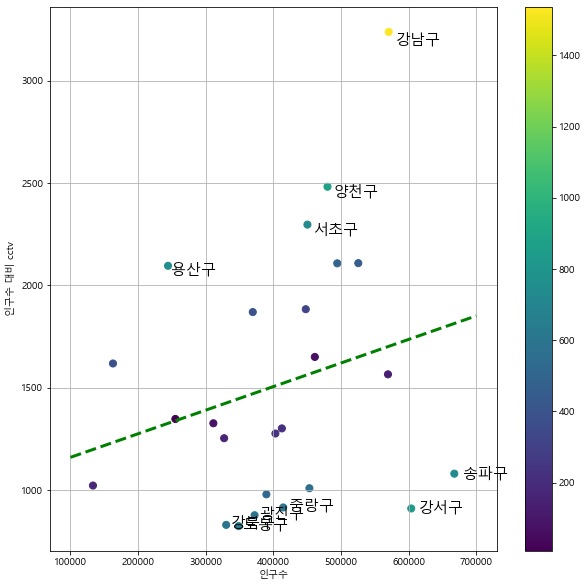

In [429]:
# 오차 반영한 그래프 작성
# 오차가 큰 10개구 이름을 그래프에 표시
# 오차 수치 색상 표현
# 분산형 산점도그래프
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'],
            c= data_result['오차'],s=50) #x값,y값
plt.plot(x_nums,func(x_nums), ls='dashed', lw=3,color='g')
#오차가 큰 10개만 텍스트 출력
# text (x위치 y위치 출력 텍스트 글자크기)
# x *1.02 : 점보다 약간 오른쪽 
# y * 0.98 약간아래로 
# df_ sort.index[n] : 오차가 큰 10구 선택
for n in range(10) : 
    plt.text(df_sort['인구수'][n]*1.02, 
            df_sort['소계'][n]*0.98,
            df_sort.index[n],fontsize=15)
plt.xlabel('인구수')
plt.ylabel('인구수 대비 cctv')

plt.colorbar ()
plt.grid()
plt.show()



In [ ]:
#성루시에서 다른 구와 비교했을때 
-강남구, 양천구, 서초구, 은평구는 cctv가 개수가 많지만
-송파 ,강서, 도봉, 마포구는 다른구에 비해 cctv 비율이 낮다


In [431]:
#결과 파일로 저장 ##한글 전용!!!####################################
#결과를 '구별'로 정렬한 후에  csv 파일로 저장
cctv_result=data_result.sort_values(by='구별')
cctv_result.to_csv('../data/01. CCTV_result_euc_kr.csv',
                  header=True,
                  index= True,
                  encoding='euc-kr')
#encoding='euc-kr' 로 저장하면 읽을때도 encoding='euc-kr' 로 해야함

In [432]:
#utf-8로 저장
cctv_result=data_result.sort_values(by='구별')
cctv_result.to_csv('../data/01. CCTV_result_utf_8.csv',
                  header=True,
                  index= True,
                  encoding='utf-8')
#깨짐!



In [443]:
# 저장한 파일 읽어와서 확인 
cctv_result=pd.read_csv('../data/01. CCTV_result_euc_kr.csv',
                       encoding='euc-kr',
                       index_col= 0)# 이거 없을시 앞에 012345 범례붙음
cctv_result 
#index_col = 0 : 정수인덱스가 자동으로 붙지 않도록
# 구별 인덱스로 사용

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,557.516742
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,594.833449
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,458.249607
광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,596.164747
구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.420654,322.654216
금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458,8.656680
노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.275034,135.266110


In [ ]:
# bins : 구간의 경계값 리스트